In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df1 = df.drop(['PassengerId', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked'], axis= 'columns')

In [6]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

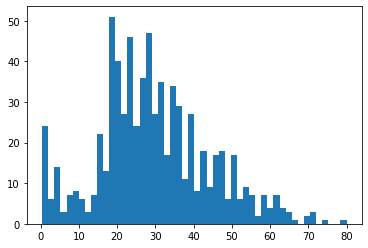

In [8]:
plt.hist(df1.Age, bins= 50)
plt.show()

In [9]:
me = df1.Age.median()
mo = 20

In [10]:
df1['Age'].isnull().count()

891

In [11]:
idx = df1['Age'].index[df1['Age'].isnull()]
total_nan_len = len(idx)
first_nan = total_nan_len//4
sec_nan = first_nan + first_nan
third_nan = first_nan + sec_nan
df1.loc[idx[0:first_nan], 'Age'] = 22
df1.loc[idx[first_nan:sec_nan], 'Age'] = 25
df1.loc[idx[sec_nan:third_nan], 'Age'] = 30
df1.loc[idx[third_nan:total_nan_len], 'Age'] = 33

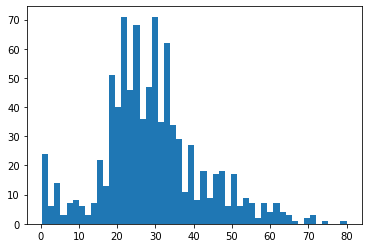

In [12]:
plt.hist(df1.Age, bins= 50)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le_sex= LabelEncoder()

In [14]:
df1.Sex = le_sex.fit_transform(df1.Sex)

In [15]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [16]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [17]:
df1.tail()

,Survived,Pclass,Sex,Age,Fare
886,0,2,1,27.0,13.00
887,1,1,0,19.0,30.00
888,0,3,0,33.0,23.45
889,1,1,1,26.0,30.00
890,0,3,1,32.0,7.75


In [19]:
X= df1.iloc[:,1:]
y= df1.iloc[:,0]

In [21]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [26]:
X_train

array([[-1.56610693,  0.73769513,  1.23317415, -0.07458307],
       [-0.36936484,  0.73769513, -0.47623635, -0.38667072],
       [ 0.82737724,  0.73769513,  0.20752785, -0.48885426],
       ...,
       [ 0.82737724,  0.73769513,  0.89129205, -0.36435545],
       [-1.56610693, -1.35557354, -1.16000055,  1.76774081],
       [-1.56610693,  0.73769513, -0.62818395,  0.90773798]])

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dc = DecisionTreeClassifier()

In [29]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
dc.score(X_test, y_test)

0.7597765363128491

In [31]:
y_predict = dc.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[83, 22],
       [21, 53]], dtype=int64)